# Puneethkrishna_DSFT8_MINI_PROJECT_4

## &#10148;Problem Statement </br> 
### <div class="alert alert-info">Every business owner's objective is to estimate the future trends - in terms of sales, profits, gains etc.For each entity, a forecast can be estimated based on the past sales of that entity. The idea behind this is to find out the popularity of a certain product and how its sales can impact the business. Every product category is unique and cater to different customer base. So the analysis cannot be generalized that one trend is applicable to all products. A thorough insight into the past performance will reveal a lot of components that will enable the business to identify the trends.</div>

## &#10148; Requried Libraries</br>

In [1]:
import pandas as pd                                                # Working with dataframe and series
import numpy as np                                                 # Working with numpy arrays
import matplotlib.pyplot as plt                                    # Visualization library
import seaborn as sns                                              # Visualization library
from sklearn.preprocessing import LabelEncoder                     # For converting cat to num
import warnings
warnings.filterwarnings('ignore')                                  # To avoide the warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler     # For scaling purpose
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.facecolor':'lightblue'})                       # plots background highlight
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model

## &#10148; Data import and checking some information about data features</br>

In [2]:
df = pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xls", index_col='Order Date', parse_dates=True)
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
F_df = df[df.Category == 'Furniture']
F_df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
# Structure of the dataset
F_df.shape

(2121, 20)

In [5]:
# Information of the dataset features
F_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Ship Date      2121 non-null   datetime64[ns]
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Pro

In [6]:
# Statistical information of the dataset features
F_df.describe([.95, .99])

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
95%,9494.000000,98103.000000,1317.492000,8.000000,0.600000,190.429800
99%,9898.800000,98115.000000,2566.883200,11.000000,0.600000,401.311080
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


## &#10148; Exploratory Data Analysis</br>

In [7]:
F_df.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
F_df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
h = pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xls")
h.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
F_df['year'] = F_df.index.year
F_df['month'] = F_df.index.month
F_df['day'] = F_df.index.month

In [12]:
df_new = df.groupby(['Order Date'])['Sales'].sum()
df_new.shape

(1237,)

In [13]:
df1 = df_new.resample('W').sum()
df1.shape

(209,)

In [14]:
df_new2 = df.groupby(['Order Date'])['Sales', 'Discount', 'Profit'].sum()
df2 = df_new2.resample('W').sum()
df2 = pd.DataFrame(df2)
df2.head()

,Sales,Discount,Profit
Order Date,,,
2014-01-05,324.044,1.60,-55.5549
2014-01-12,4599.572,1.80,1322.7434
2014-01-19,4509.127,5.05,398.8863
2014-01-26,3842.388,1.00,758.0377
2014-02-02,1642.310,1.45,239.5467


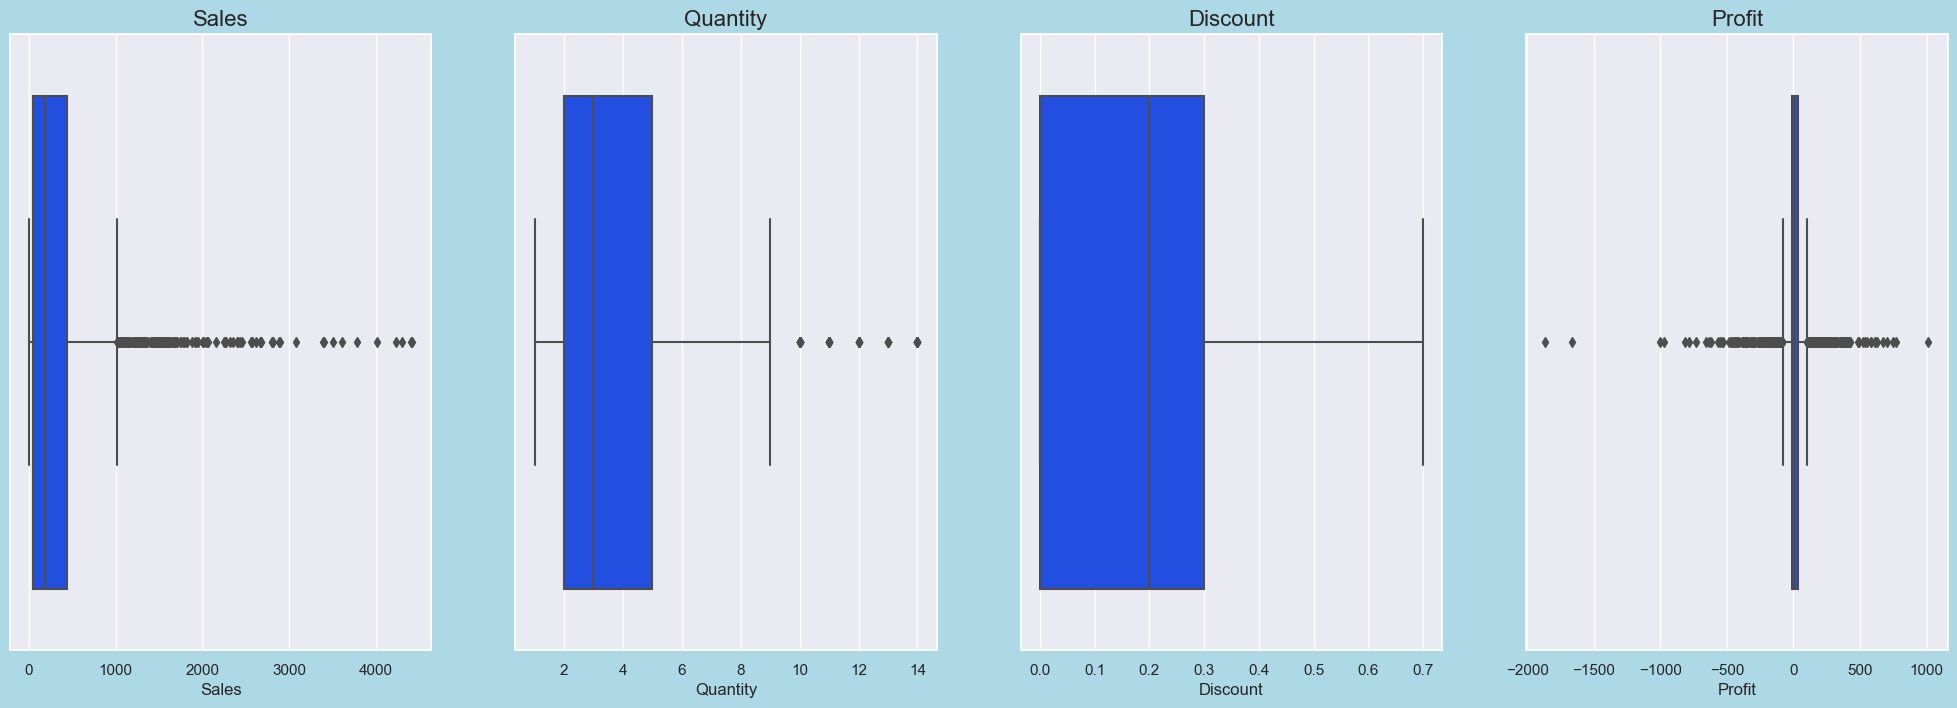

In [15]:
L = ['Sales', 'Quantity', 'Discount', 'Profit']
t = 1
plt.figure(figsize = (25, 8))
for i in L:
    plt.subplot(1, 4, t)
    sns.boxplot(F_df[i], palette = 'bright')
    plt.title(i, fontsize = 16)
    t = t + 1

### <div class="alert alert-info">Interpretation
**- From the above box plot we can see the distribution of numerical columns in the dataset and there are outliers present in the data**</div>

In [16]:
F_df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'year', 'month', 'day'],
      dtype='object')

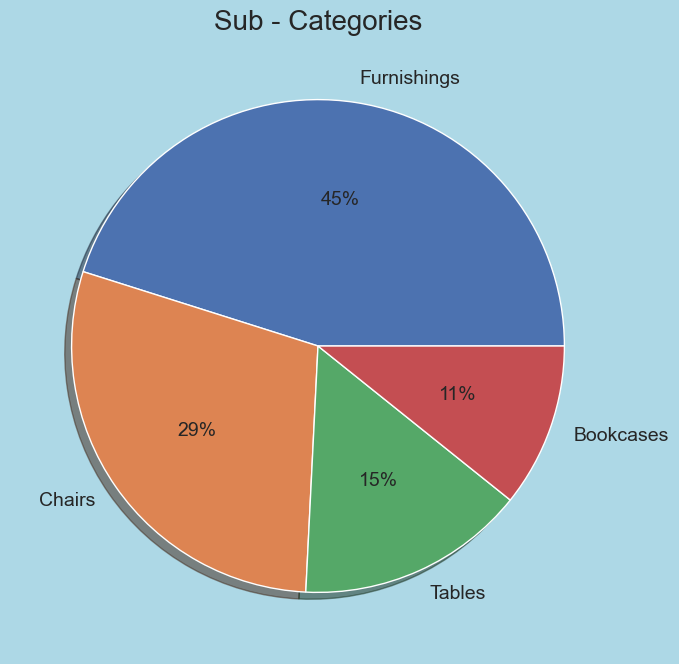

In [17]:
plt.figure(figsize = (15, 8))
plt.pie(F_df['Sub-Category'].value_counts(), labels = F_df['Sub-Category'].value_counts().index, autopct = '%.0f%%', shadow = True, textprops={'fontsize': 14})
plt.title('Sub - Categories', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above pie chart we can see that the furnishings products are more proportion compared to all other products**</div>

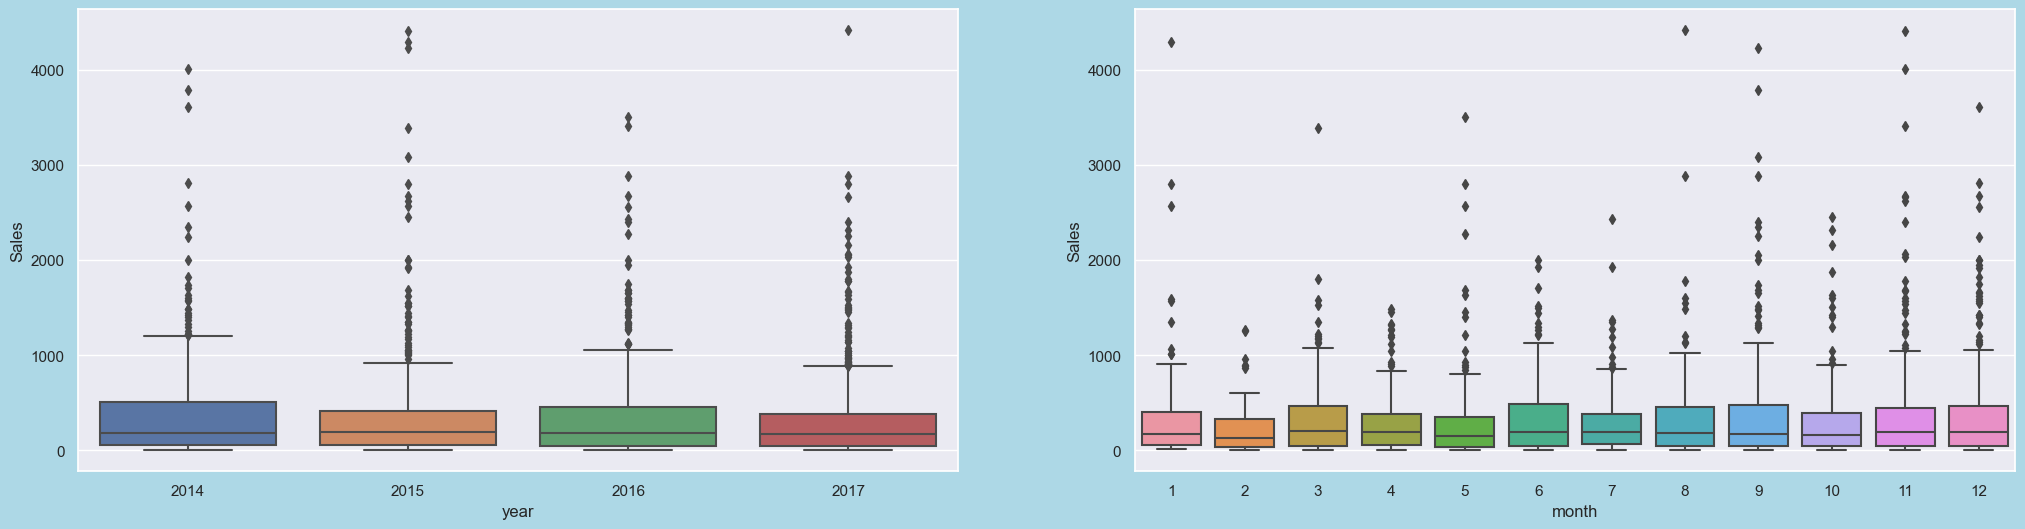

In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.boxplot(F_df.year, F_df.Sales)

plt.subplot(1, 2, 2)
sns.boxplot(F_df.month, F_df.Sales)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the visualisation we can see how the sales distributed over the years as well as months, the mean and the variation is almost same over the period based on that we can conclude that the data is stationary**</div>

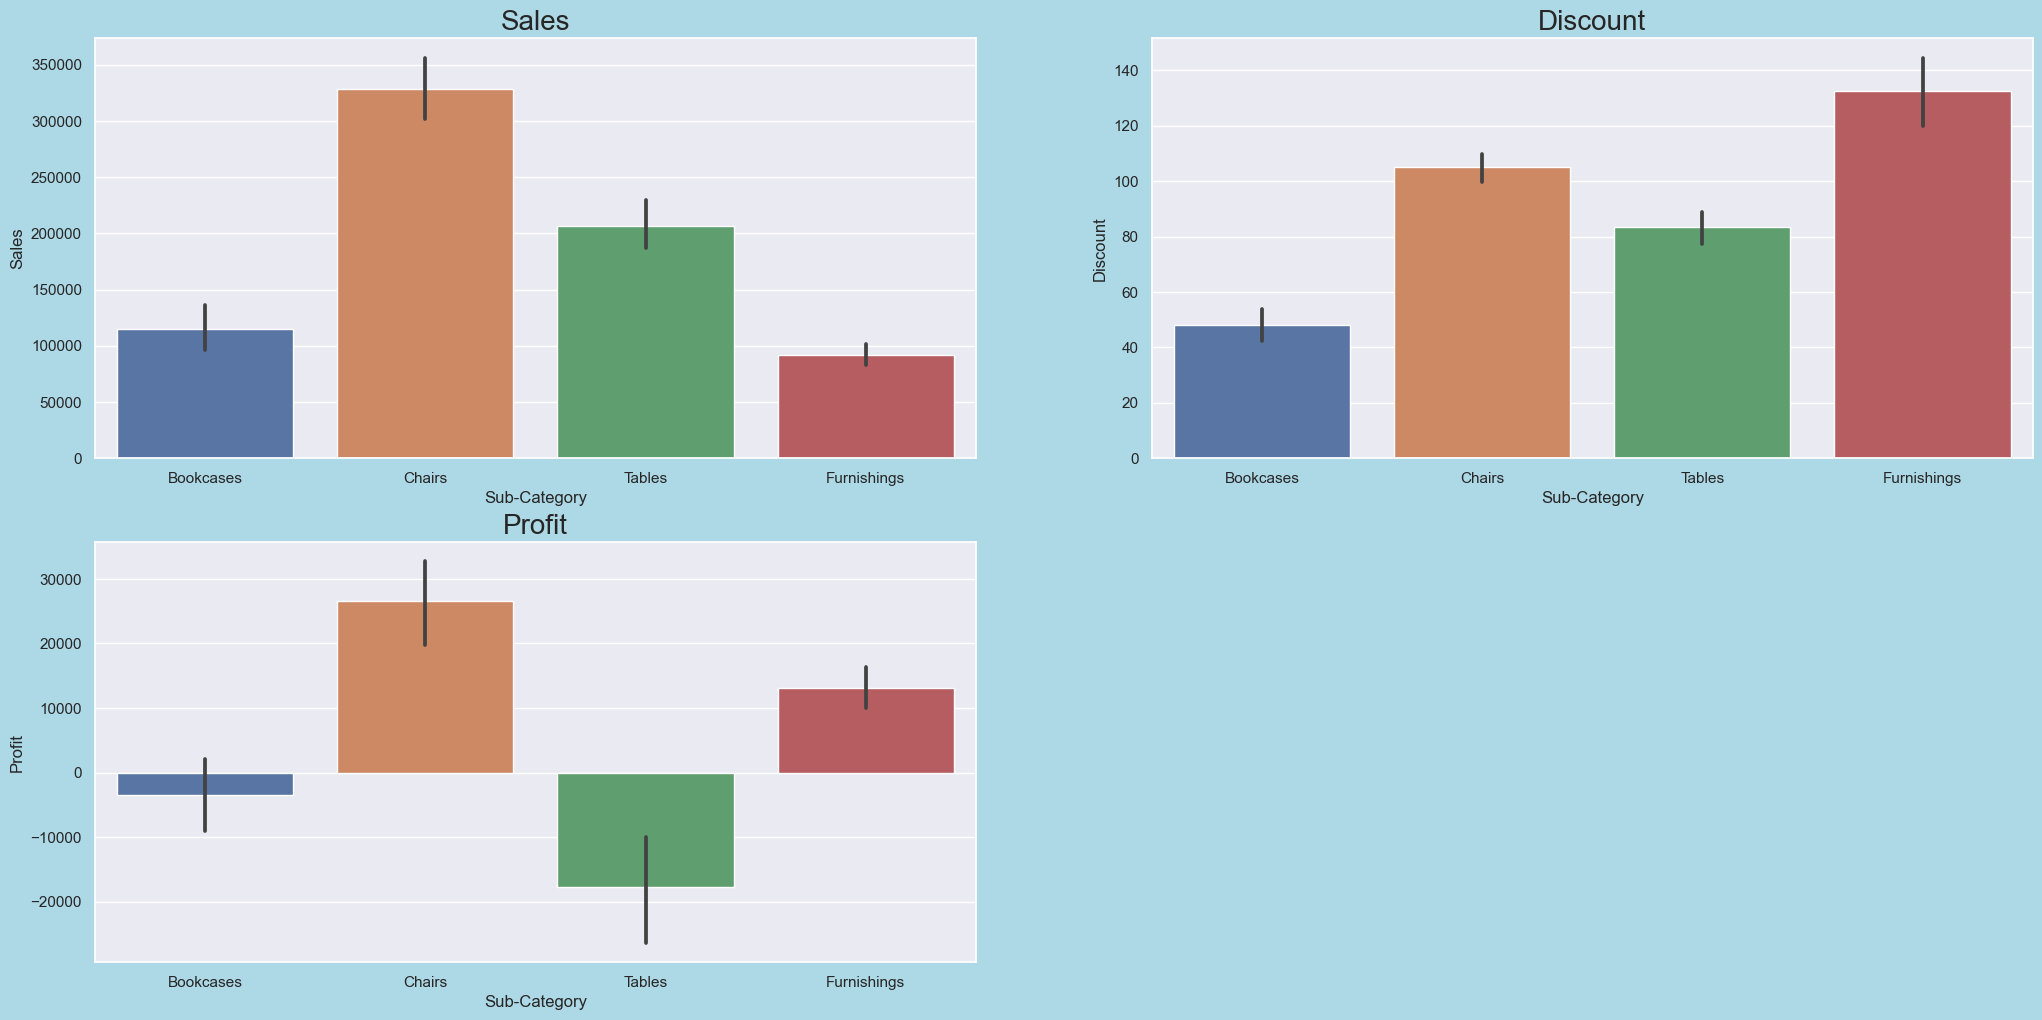

In [19]:
plt.figure(figsize = (25, 12))
plt.subplot(2, 2, 1)
sns.barplot(F_df['Sub-Category'], F_df['Sales'], estimator=sum)
plt.title('Sales', fontsize = 20)

plt.subplot(2, 2, 2)
sns.barplot(F_df['Sub-Category'], F_df['Discount'], estimator=sum)
plt.title('Discount', fontsize = 20)

plt.subplot(2, 2, 3)
sns.barplot(F_df['Sub-Category'], F_df['Profit'], estimator=sum)
plt.title('Profit', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the visualisation we can see that the chairs product is possitively impact on the organization and the tables product is negetively impact on the organization**</div>

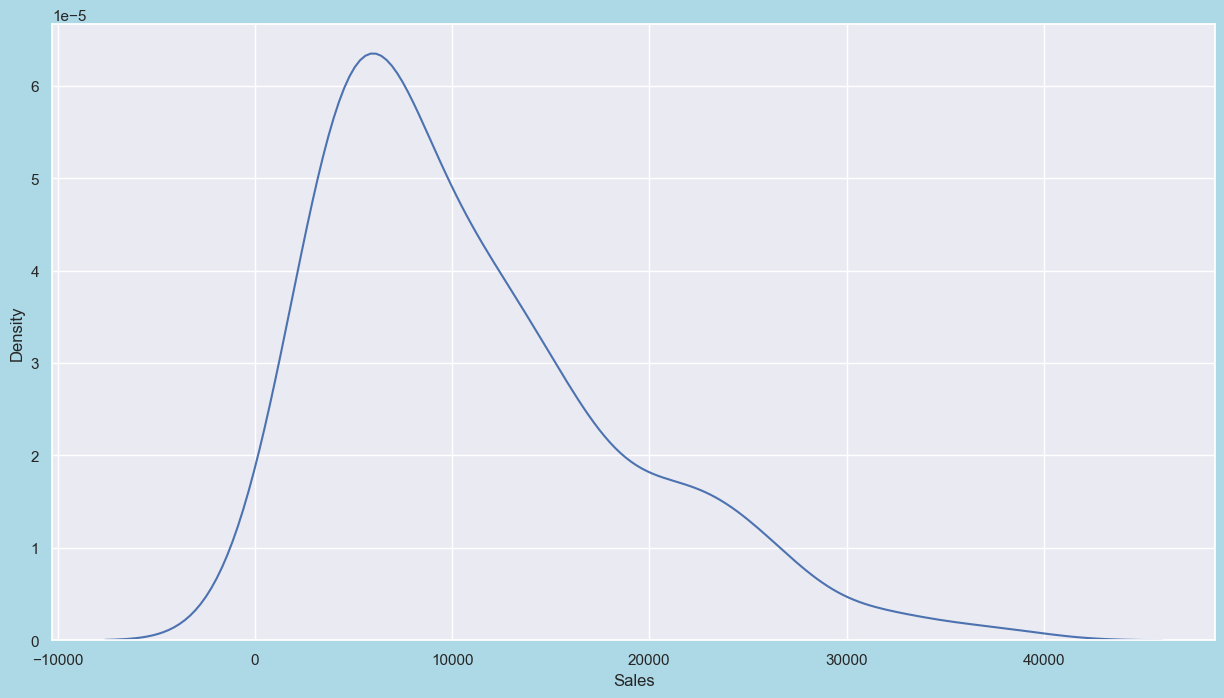

In [20]:
plt.figure(figsize=(15, 8))
sns.kdeplot(df1)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the visualisation we can see how sales is distributed so we can tell that it is right skeewed so the more data is present in the left side**</div>

#### &#10148;  Components of time series

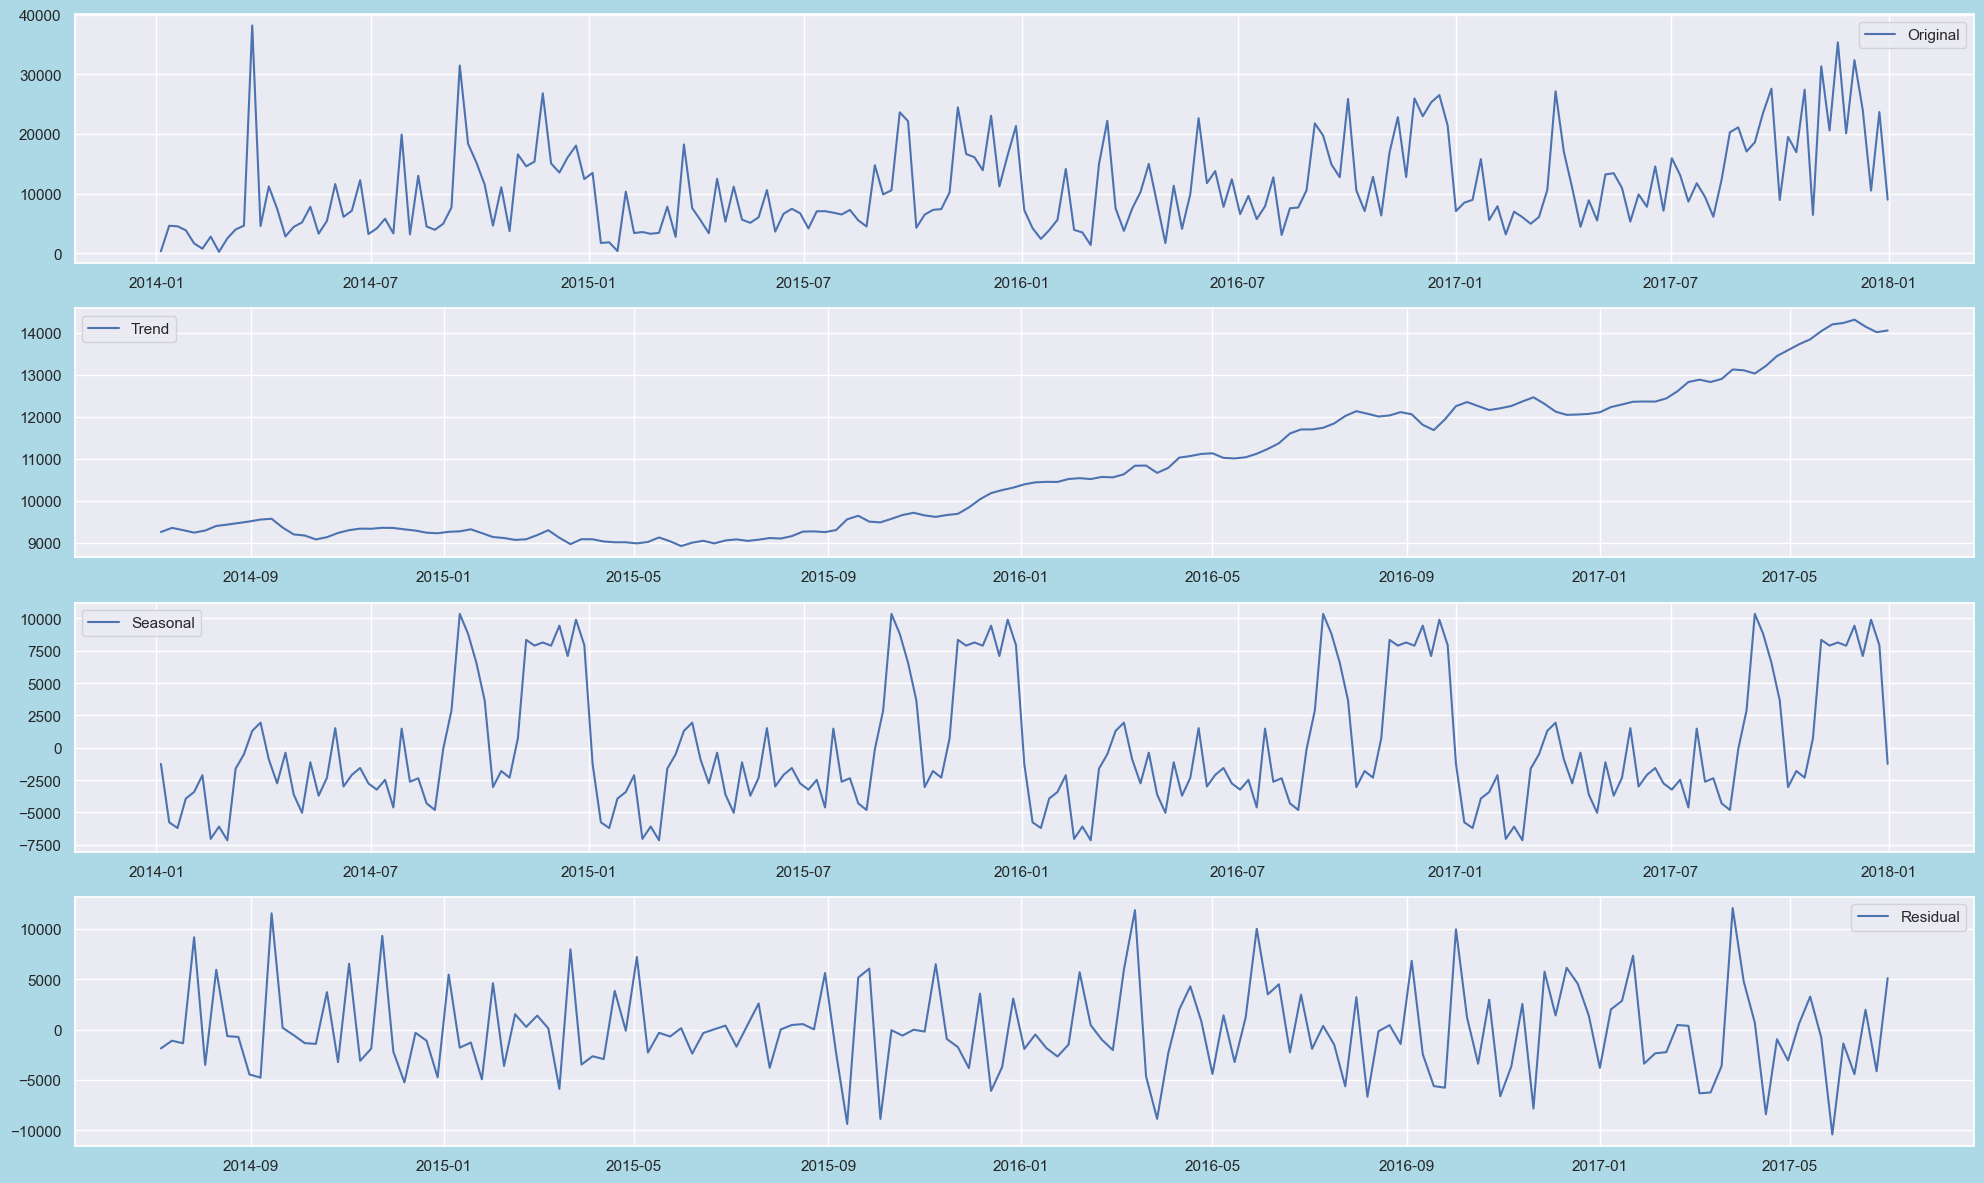

In [21]:
decomposition=seasonal_decompose(df1, period=52)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df1,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

## &#10148;  Data Preprocessing

#### &#10148;  Stationarity checking

In [22]:
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [23]:
checkstationary(df1)

'Pvalue:1.9502989277502554e-07. Data is stationary, Proceed to model building'

### <div class="alert alert-info">Interpretation
**- From augmented dickey fuller test we can see that the data is stationary we can build the model using this data**</div>

#### &#10148;  Data splitting

In [24]:
split = int(0.7 * len(df1))
train = df1.iloc[:split]
test = df1.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 146, Test = 63


#### &#10148;  ACF and PACF plots

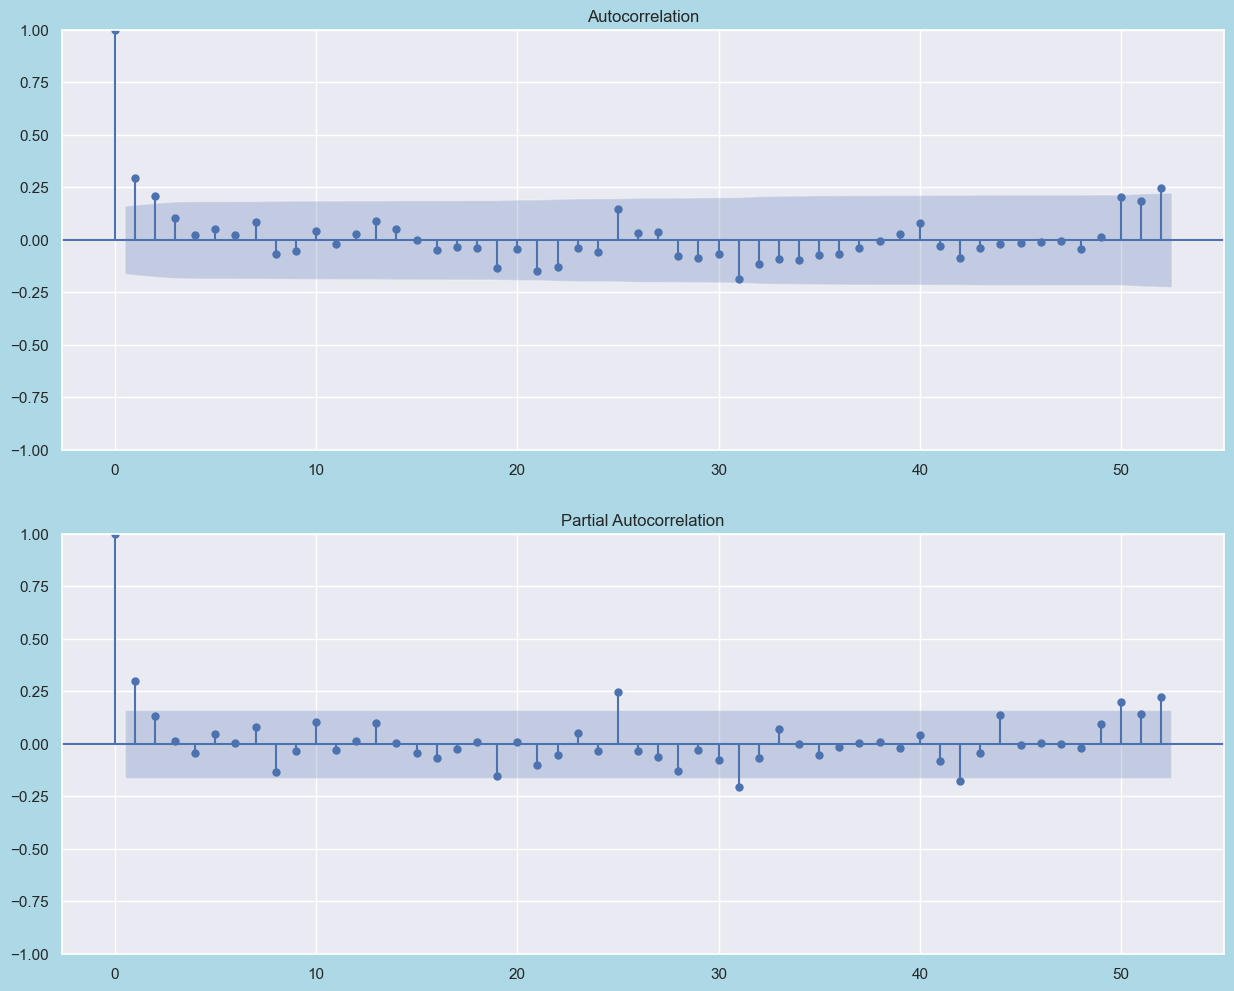

In [25]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(train, ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(train, ax=plt.gca(), lags = 52)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above plots we can take AR(p) and MA(q) values which is lags from the ACF and PACF plots. The p value could be any form 0 to 6 and q value could any value from 0 to 3**</div>

## &#10148;  Build, Predict and evaluate the model

### <div class="alert alert-info">Observations of EDA
- **Trend is present in the dataset**
- **seasonality is present in the dataset**
- **Data set is stationary**
- **Analysis should be in terms of time**

### <div class="alert alert-info">Selection of algorithms
- **Based on the EDA observations we need to select time series algoritms**
- **As the trend and seasonality present need to select algoritmns which capture trend and seasonality**

### &#10148;  ARMA Algorithm

#### &#10148;  Hyperparameter tuning

In [26]:
def arima_model(p,d,q):
    m1 = ARIMA(train,order=(p,d,q)).fit()
    forecast = m1.forecast(len(test))
    actual=[]
    forcasted=[]

    for i in range(len(test)):
        actual.append(test[i])
        forcasted.append(forecast[i])
    RMSE=round(np.sqrt(mean_squared_error(actual,forcasted)),3)
    return RMSE,actual,forcasted

In [27]:
p1=[]
q1=[]
rmse1=[]

for i in range(0, 6):
    for j in range(0, 3):
        p1.append(i)
        q1.append(j)
        rmse1.append(arima_model(i,0,j)[0])

C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
val1=pd.DataFrame(zip(p1,q1,rmse1),columns=['p','q','RMSE'])

In [29]:
val1.sort_values(by='RMSE').head(1)

,p,q,RMSE
17,5,2,9679.378


### <div class="alert alert-info">Interpretation
**- From the above function we can take optimal p and q value as 5 and 2 to get less error in model building**</div>

#### &#10148;  Model building

#### &#10148;  ARMA

In [77]:
import statsmodels.api as sm
model1 = ARIMA(train, order=(4, 0, 2)).fit()
pvalue = sm.stats.acorr_ljungbox(model1.resid,lags=[1],return_df=True)['lb_pvalue'].values

In [78]:
if pvalue < 0.05:
    print('It is not a good Model')
else :
    print('It is a Good Model')

It is a Good Model


In [30]:
def ARMA(df):
    model1 = ARIMA(train, order=(4, 0, 2)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model1.summary()
    pred1 = model1.predict()
    forecast1 = model1.forecast(len(test))
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [31]:
ARMA(train)

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: S


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  146
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -1483.350
Date:                Mon, 14 Nov 2022   AIC                           2982.700
Time:                        10:39:01   BIC                           3006.568
Sample:                    01-05-2014   HQIC                          2992.398
                         - 10-16-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9347.2017   1169.437      7.993      0.000    7055.147    1.16e+04
ar.L1         -1.1865      0.089    -13.399      0.000      -1.360      -1.013
ar.L2         -0.4133      0.154     -2.681      0.007      -0.715      -0.111
ar.L3          0.3976      0.180      2.206      0.027       0.044       0.751
ar.L4          0.0602      0.118      0.511      0.609      -0.171       0.291
ma.L1          1.4927      0.100     14.867      0.000       1.296       1.690
ma.L2          0.9952      0.125      7.961      0.000       0.750       1.240
sigma2      4.102e+07      0.046   8.85e+08      0.000     4.1e+07     4.1e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               122.33
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             1.48
Prob(H) (two-sided):                  0.29   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.1e+24. Standard errors may be unstable.
"""

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: past


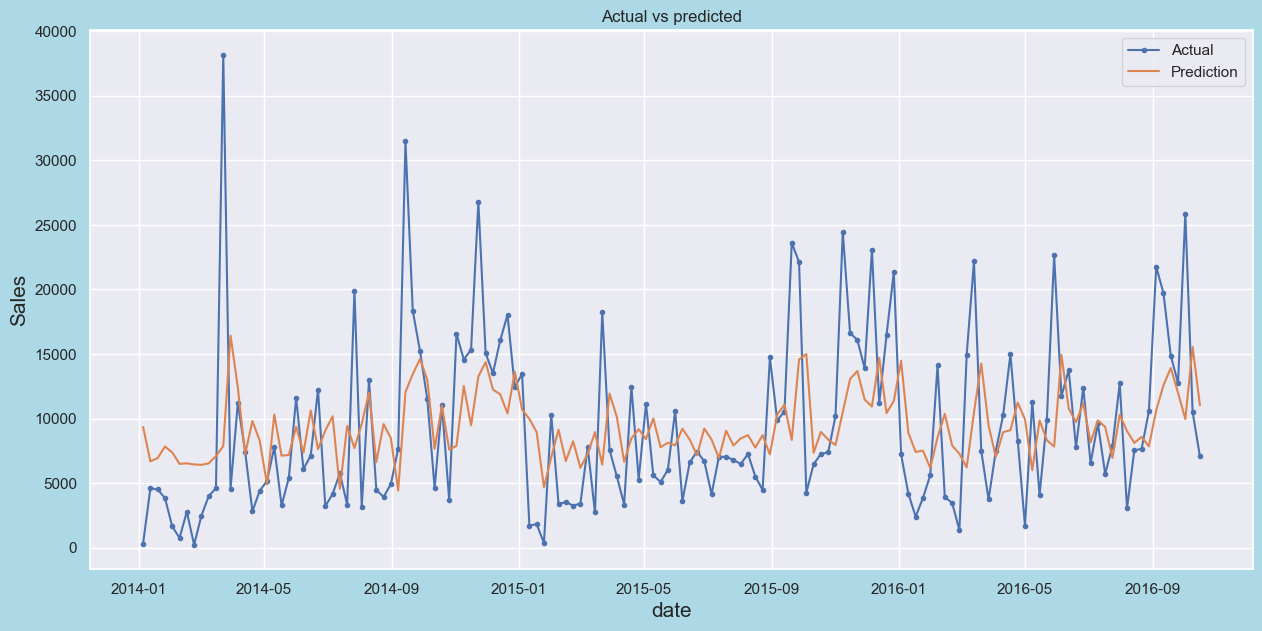

In [32]:
plt.figure(figsize=(15,7))
plt.title('Actual vs predicted')
plt.plot(train, marker = '.', label = 'Actual')
plt.plot(ARMA(train), label = 'Prediction' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

In [34]:
past_mse1 = mean_squared_error(train, ARMA(train))
past_rmse1 = np.sqrt(mean_squared_error(train, ARMA(train)))

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: past
Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: past


### <div class="alert alert-info">Interpretation
**- From the above plot between train vs past data prediction values where we can see the lot of errors in the visualization**</div>

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


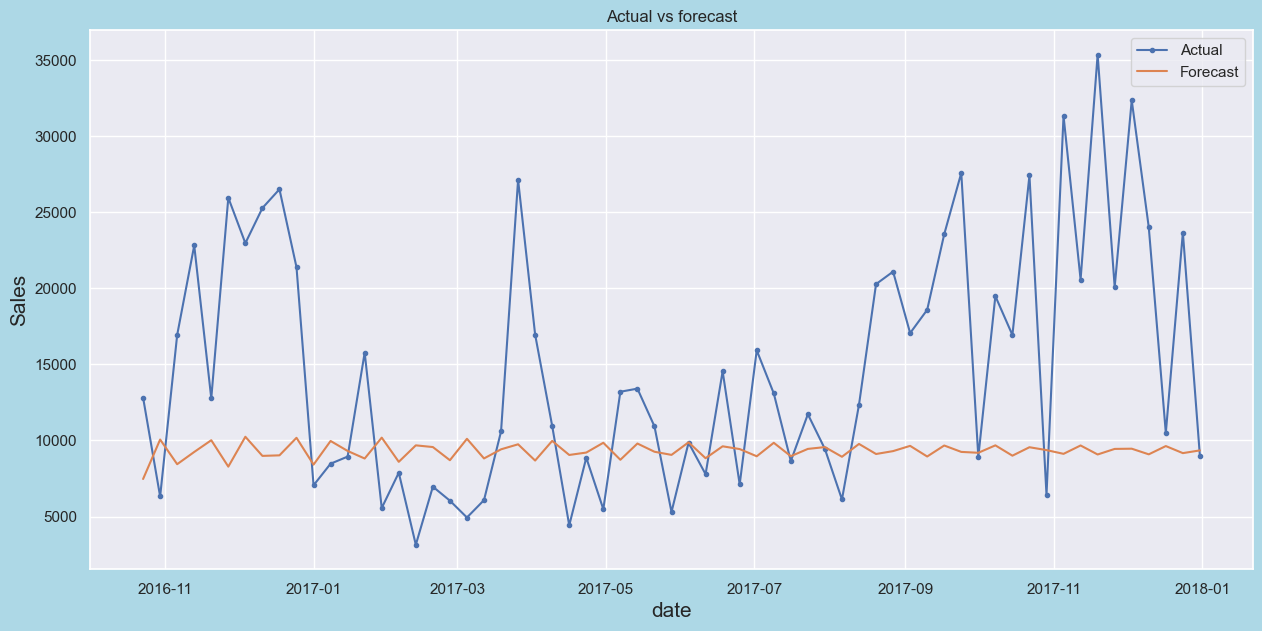

In [35]:
plt.figure(figsize=(15,7))
plt.title('Actual vs forecast')
plt.plot(test,marker = '.', label = 'Actual')
plt.plot(ARMA(train), label = 'Forecast' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above plot between test data vs forcast data where the prediction was not that much accurate we can see more error in the plot**</div>

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


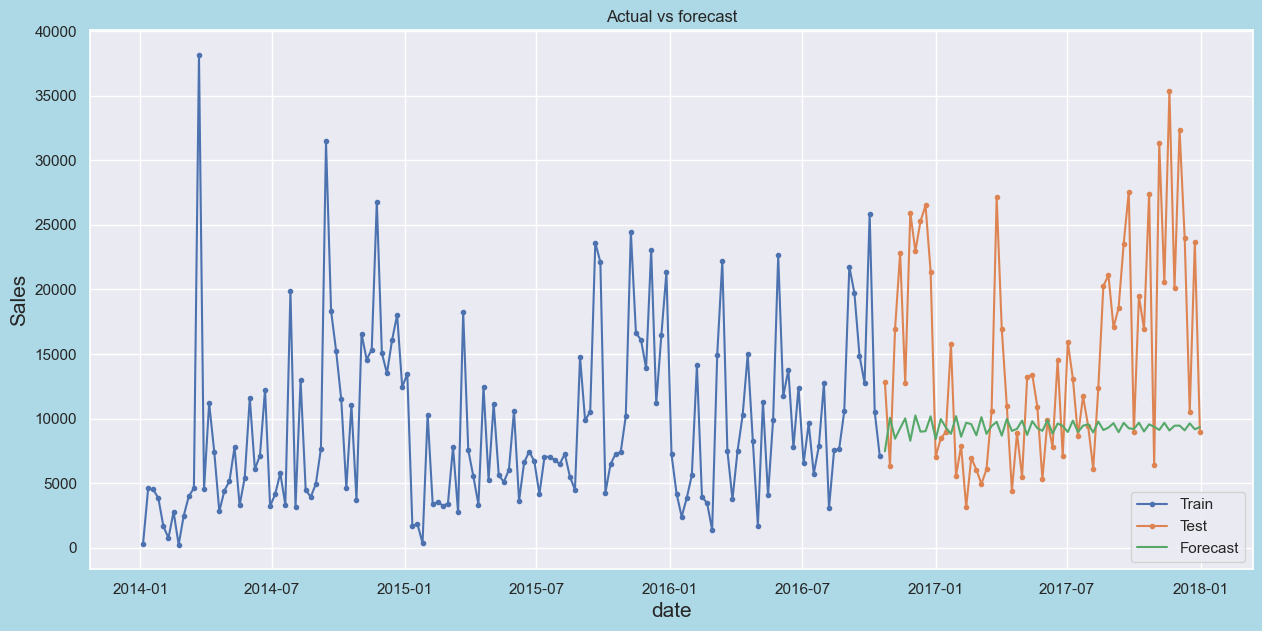

In [36]:
plt.figure(figsize=(15,7))
plt.title('Actual vs forecast')
plt.plot(train,marker = '.', label = 'Train')
plt.plot(test,marker = '.', label = 'Test')
plt.plot(ARMA(train), label = 'Forecast' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

### <div class="alert alert-info">Interpretation
**- Above plot shows the train, test and forcast data plots we can see how the model forcast the future information**</div>

In [38]:
future_mse1 = mean_squared_error(test, ARMA(train))
future_rmse1 = np.sqrt(mean_squared_error(test, ARMA(train)))

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df
Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


#### &#10148;  SARIMA

In [39]:
def sarima_model(p,d,q,P,D,Q):
    sm1=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,52)).fit()
    f1=sm1.forecast(len(test))
    actual=[]
    predicted=[]
    for i in range(len(f1)):
        actual.append(test[i])
        predicted.append(f1[i])
    RMSE=round(mean_squared_error(actual,predicted,squared=False),3)
    return RMSE,actual,predicted

In [40]:
p=4
d=0
q=2
rmse1=[]
P=[0,1, 2]
Q=[0,1, 2]
D=0
P1=[]
Q1=[]
for k in range(len(P)):
    for l in range(len(Q)):
        P1.append(P[k])
        Q1.append(Q[l])
        rmse1.append(sarima_model(p,d,q,P[k],D,Q[l])[0])

C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [41]:
val2=pd.DataFrame(zip(P1,Q1,rmse1),columns=['P','Q','RMSE'])
val2.sort_values(by='RMSE').head(1)

,P,Q,RMSE
5,1,2,8547.717


### <div class="alert alert-info">Interpretation
**- From the above function we can take optimal seasonality parameters P and Q value as 1 and 2 to get less error in model building**</div>

In [42]:
def SARMA(df):
    model2 = SARIMAX(train,order=(4, 0, 2),seasonal_order=(1,0,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test))
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [46]:
print(SARMA(train))

C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: S
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  146
Model:             SARIMAX(4, 0, 2)x(1, 0, 2, 52)   Log Likelihood               -1486.227
Date:                            Mon, 14 Nov 2022   AIC                           2992.454
Time:                                    10:48:20   BIC                           3022.290
Sample:                                01-05-2014   HQIC                          3004.577
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0

C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: past


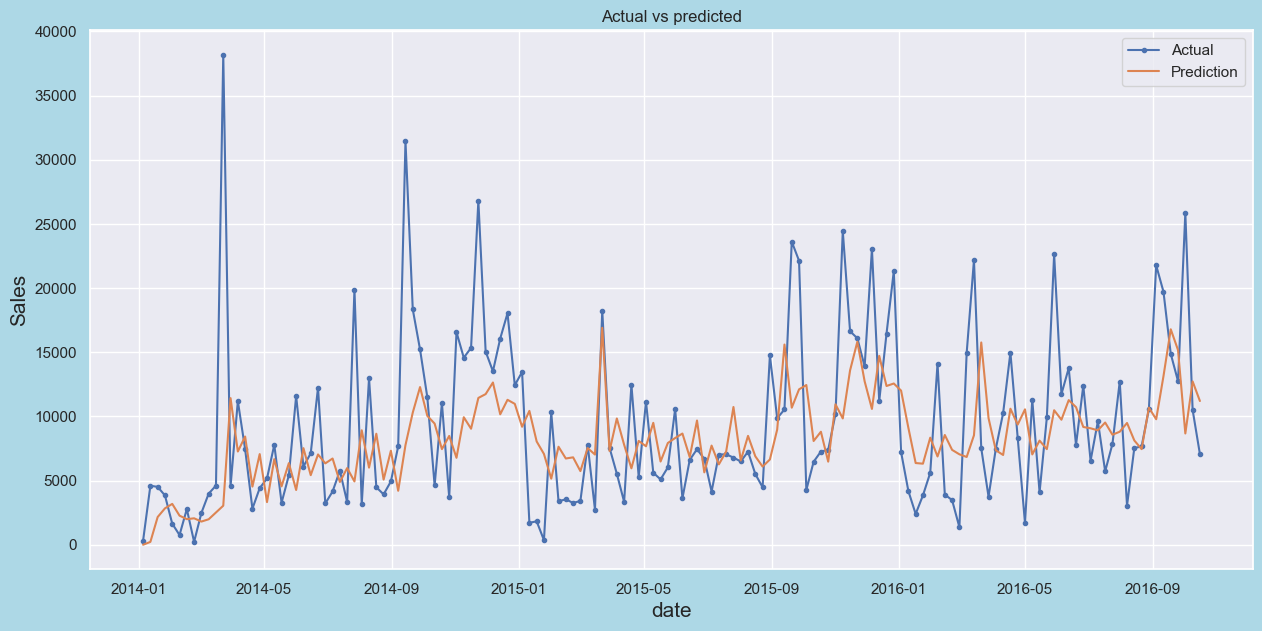

In [44]:
plt.figure(figsize=(15,7))
plt.title('Actual vs predicted')
plt.plot(train, marker = '.', label = 'Actual')
plt.plot(SARMA(train), label = 'Prediction' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

In [47]:
past_mse2 = mean_squared_error(train, SARMA(train))
past_rmse2 = np.sqrt(mean_squared_error(train, SARMA(train)))

C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: past


C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: past


### <div class="alert alert-info">Interpretation
**- From the above plot between train vs past data prediction values where we can see the past data prediction is better than ARMA**</div>

C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


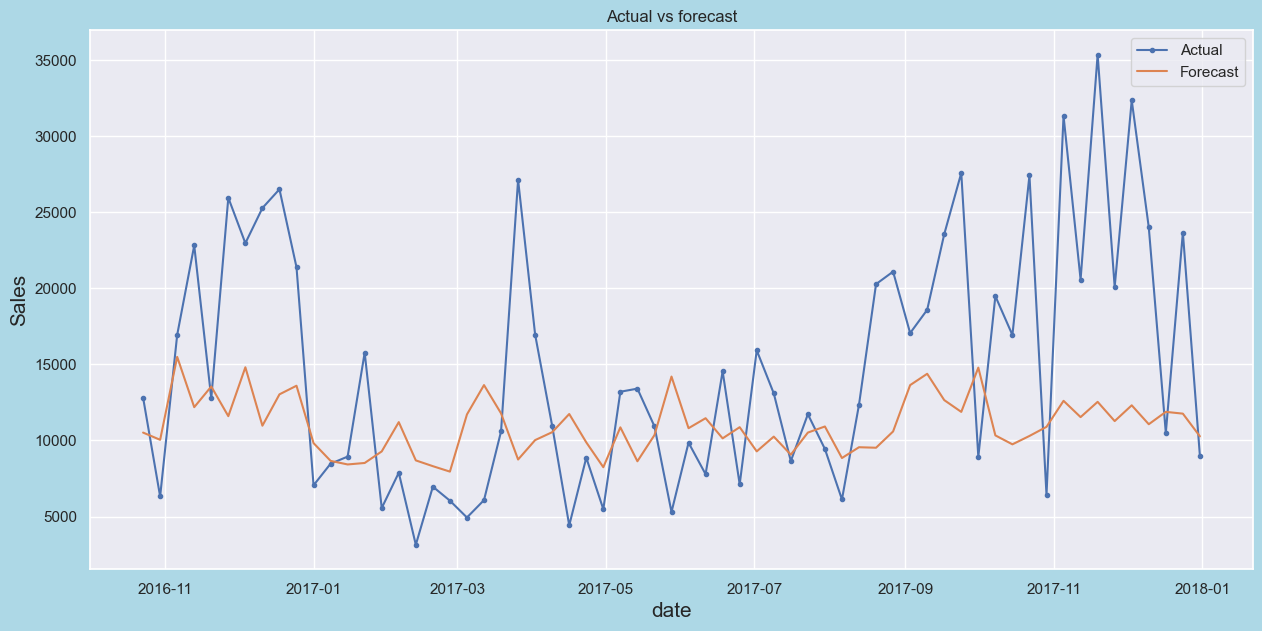

In [48]:
plt.figure(figsize=(15,7))
plt.title('Actual vs forecast')
plt.plot(test,marker = '.', label = 'Actual')
plt.plot(SARMA(train), label = 'Forecast' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above plot between test data vs forcast data prediction values where the prediction better compared to ARMA model**</div>

C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


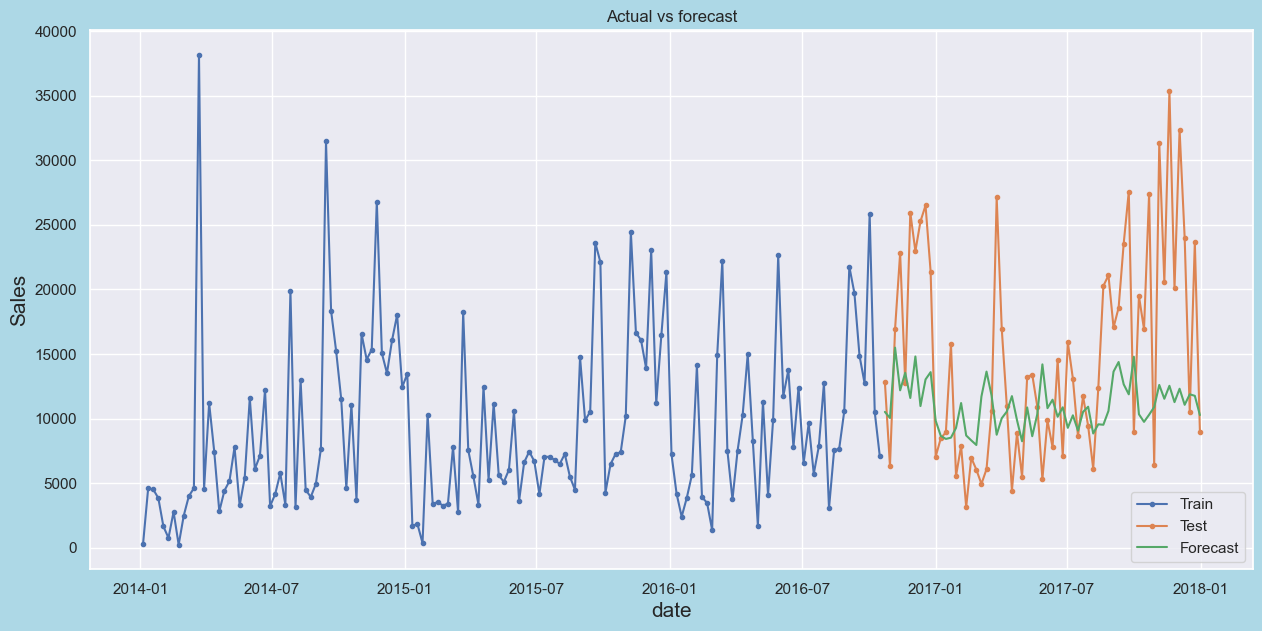

In [49]:
plt.figure(figsize=(15,7))
plt.title('Actual vs forecast')
plt.plot(train,marker = '.', label = 'Train')
plt.plot(test,marker = '.', label = 'Test')
plt.plot(SARMA(train), label = 'Forecast' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

In [50]:
future_mse2 = mean_squared_error(test, SARMA(train))
future_rmse2 = np.sqrt(mean_squared_error(test, SARMA(train)))

C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


### <div class="alert alert-info">Interpretation
**- Above plot shows the train, test and forcast data plots we can see how the model forcast the future information which is giving better predictions with less error than ARMA**</div>

#### &#10148;  SARIMAX

In [51]:
exog_df = df.groupby(['Order Date'])['Discount'].sum()
exog_df.shape

(1237,)

In [52]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [53]:
exog= exog_df.resample("W").sum()
exog

Order Date
2014-01-05     1.60
2014-01-12     1.80
2014-01-19     5.05
2014-01-26     1.00
2014-02-02     1.45
              ...  
2017-12-03    22.00
2017-12-10    15.10
2017-12-17    10.25
2017-12-24    12.55
2017-12-31    12.62
Freq: W-SUN, Name: Discount, Length: 209, dtype: float64

In [54]:
split = int(0.7 * len(exog))
exog_train = exog.iloc[:split]
exog_test = exog.iloc[split:]
print("Train = {}, Test = {}".format(len(exog_train), len(exog_test)))

Train = 146, Test = 63


In [55]:
def sarimax_model(p,d,q,P,D,Q):
    sm1=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,52), exog=exog_train).fit()
    f1=sm1.forecast(len(test), exog=exog_test.values)
    actual=[]
    predicted=[]
    for i in range(len(f1)):
        actual.append(exog_test[i])
        predicted.append(f1[i])
    RMSE=round(mean_squared_error(actual,predicted,squared=False),3)
    return RMSE,actual,predicted

In [56]:
p=4
d=0
q=2
rmse1=[]
P=[0,1, 2]
Q=[0,1, 2]
D=0
P1=[]
Q1=[]
for k in range(len(P)):
    for l in range(len(Q)):
        P1.append(P[k])
        Q1.append(Q[l])
        rmse1.append(sarimax_model(p,d,q,P[k],D,Q[l])[0])

In [57]:
val3=pd.DataFrame(zip(P1,Q1,rmse1),columns=['P','Q','RMSE'])
val3.sort_values(by='RMSE').head(1)

,P,Q,RMSE
8,2,2,15995.829


### <div class="alert alert-info">Interpretation
**- From the above function we can take optimal seasonality parameters P and Q value as 2 and 0 to get less error in model building**</div>

In [58]:
def SARMAX(df):
    model2 = SARIMAX(df,order=(4, 0, 2),seasonal_order=(2,0,2,52), exog = exog_train.values).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test), exog=exog_test.values)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [59]:
SARMAX(train)

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: S


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  146
Model:             SARIMAX(4, 0, 2)x(2, 0, 2, 52)   Log Likelihood               -1430.148
Date:                            Mon, 14 Nov 2022   AIC                           2884.296
Time:                                    10:54:46   BIC                           2920.099
Sample:                                01-05-2014   HQIC                          2898.843
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1450.1589     45.607     31.797      0.000    1360.770    1539.548
ar.L1          0.7554      0.770      0.981      0.327      -0.754       2.265
ar.L2         -0.5836      0.515     -1.134      0.257      -1.592       0.425
ar.L3         -0.0433      0.163     -0.266      0.790      -0.362       0.276
ar.L4         -0.0881      0.172     -0.511      0.609      -0.426       0.249
ma.L1         -0.7769      0.758     -1.025      0.305      -2.262       0.708
ma.L2          0.5250      0.517      1.016      0.309      -0.487       1.537
ar.S.L52       0.1151   1275.701   9.02e-05      1.000   -2500.213    2500.443
ar.S.L104     -0.1151    601.210     -0.000      1.000   -1178.464    1178.234
ma.S.L52      -0.0070   1280.158   -5.5e-06      1.000   -2509.071    2509.057
ma.S.L104      0.0218    739.503   2.95e-05      1.000   -1449.377    1449.420
sigma2      1.996e+07      0.513   3.89e+07      0.000       2e+07       2e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               173.42
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             1.30
Prob(H) (two-sided):                  0.80   Kurtosis:                         7.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.27e+23. Standard errors may be unstable.
"""

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: past


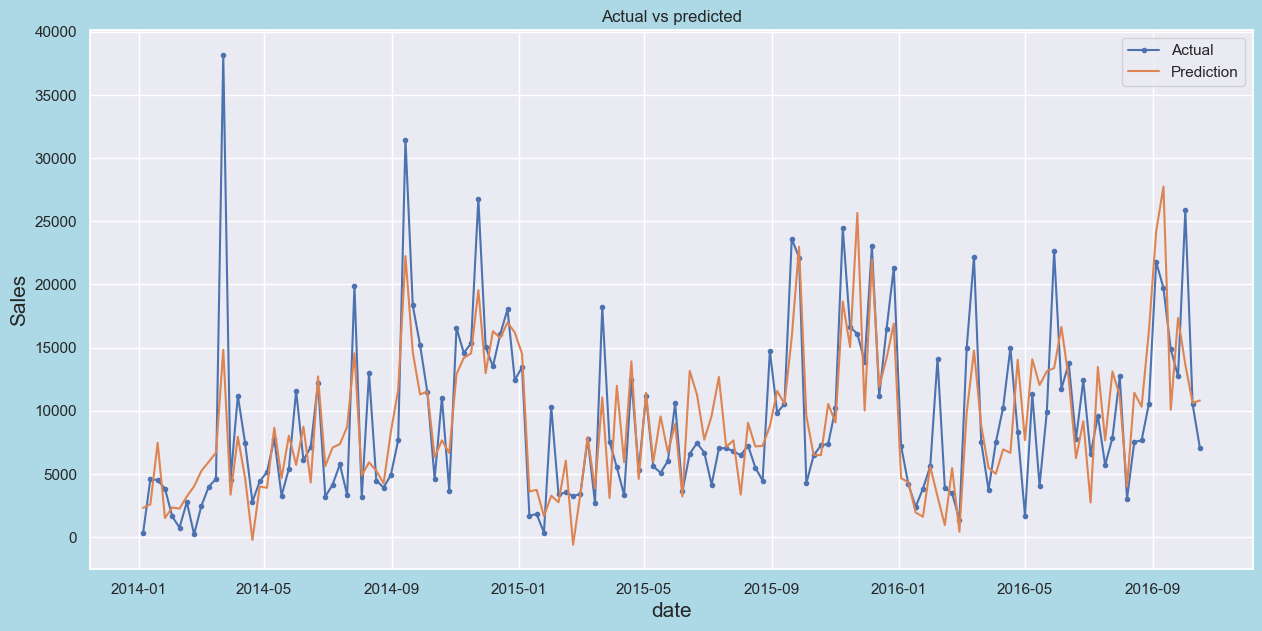

In [60]:
plt.figure(figsize=(15,7))
plt.title('Actual vs predicted')
plt.plot(train, marker = '.', label = 'Actual')
plt.plot(SARMAX(train), label = 'Prediction' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

In [61]:
past_mse3 = mean_squared_error(train, SARMAX(train))
past_rmse3 = np.sqrt(mean_squared_error(train, SARMAX(train)))

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: past
Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: past


### <div class="alert alert-info">Interpretation
**- From the above plot between train vs past data prediction values we can see the past data prediction is better than ARMA and SARIMA with less error**</div>

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


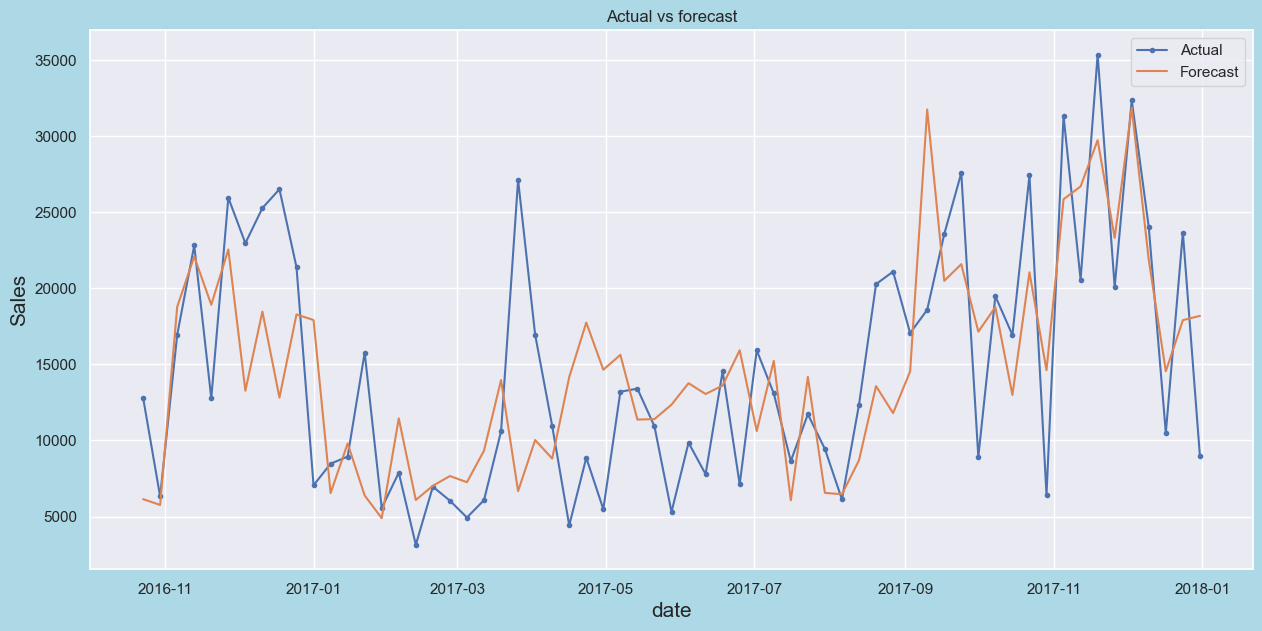

In [62]:
plt.figure(figsize=(15,7))
plt.title('Actual vs forecast')
plt.plot(test,marker = '.', label = 'Actual')
plt.plot(SARMAX(train), label = 'Forecast' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above plot between test data vs forcast data prediction values where the prediction better compared to ARMA and SARIMA model**</div>

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


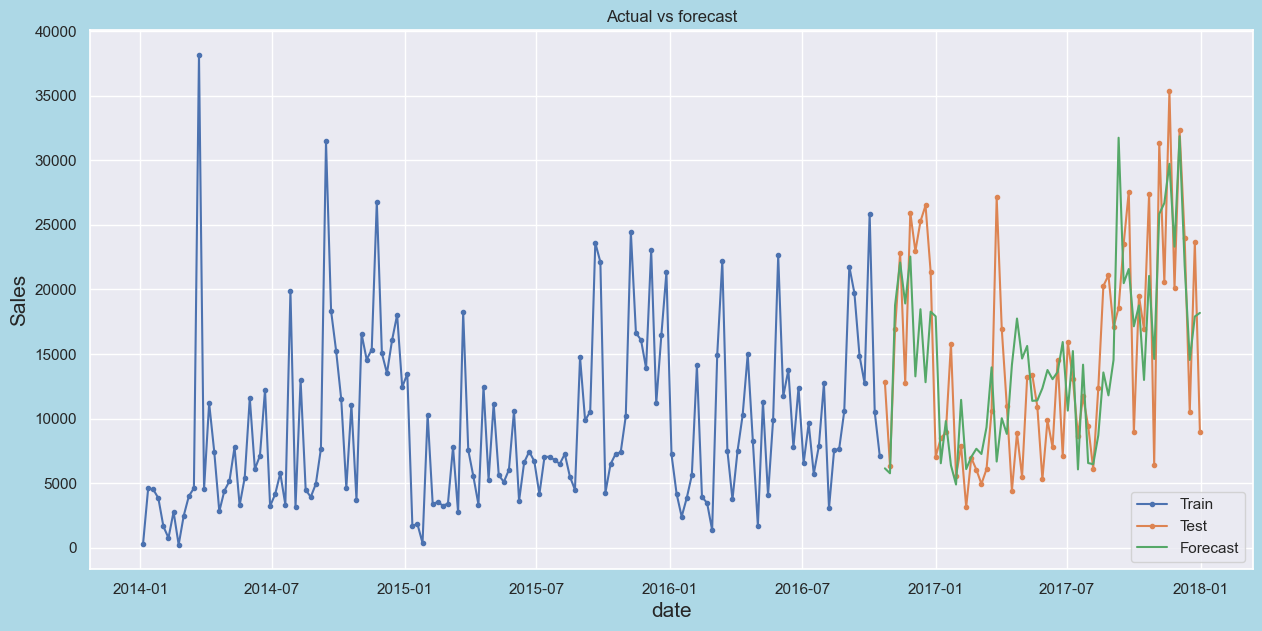

In [63]:
plt.figure(figsize=(15,7))
plt.title('Actual vs forecast')
plt.plot(train,marker = '.', label = 'Train')
plt.plot(test,marker = '.', label = 'Test')
plt.plot(SARMAX(train), label = 'Forecast' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

In [64]:
future_mse3 = mean_squared_error(test, SARMAX(train))
future_rmse3 = np.sqrt(mean_squared_error(test, SARMAX(train)))

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df
Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


#### &#10148;  Checking white noise in the data

### <div class="alert alert-info">Interpretation
**- Above plot shows the train, test and forcast data plots we can see how the model forcast the future information which is giving good predictions with less error than ARMA and SARIMA**</div>

### <div class="alert alert-info">Interpretation
**- The model is good and there is no white noise present in the model**</div>

In [65]:
a = ARMA(train)
b = SARMA(train)
c = SARMAX(train)

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df
Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


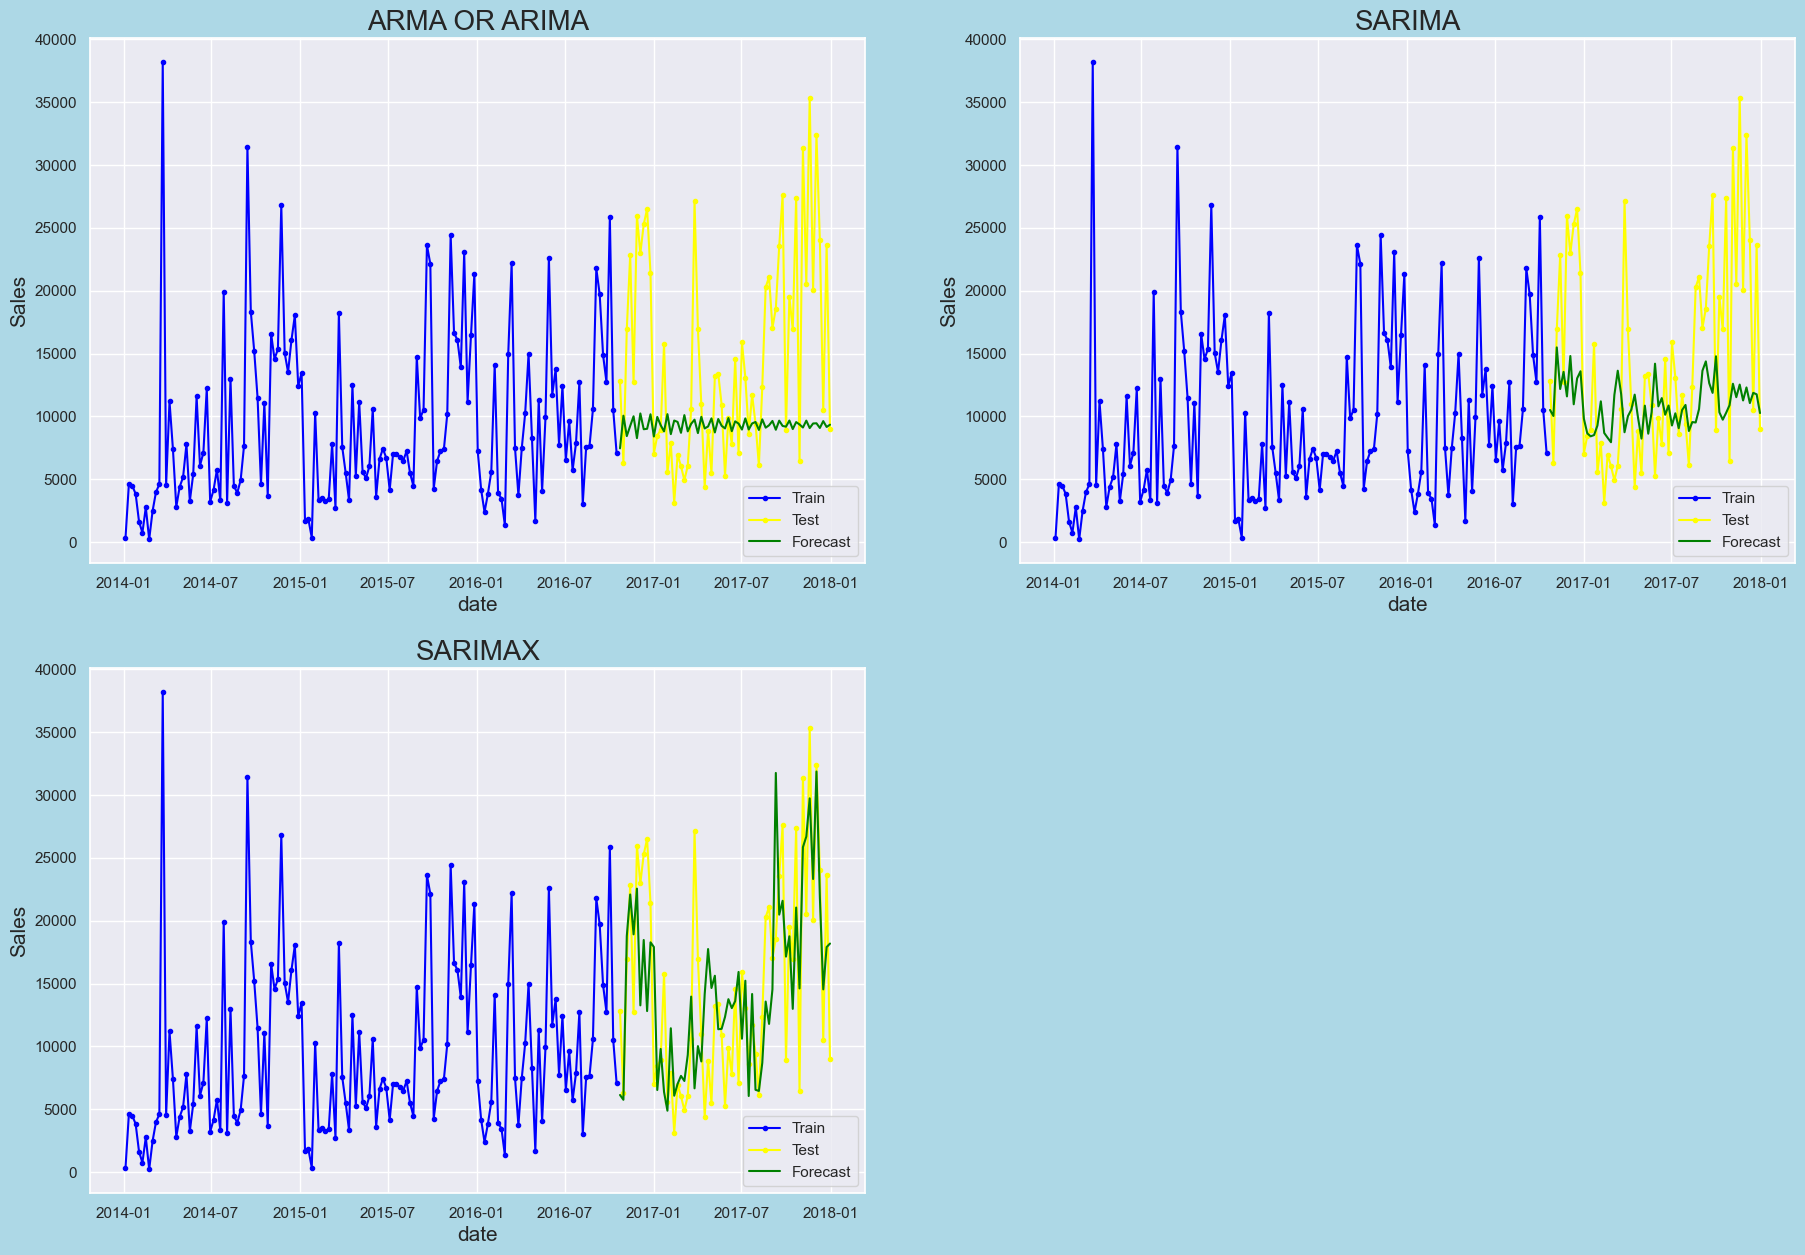

In [66]:
plt.figure(figsize=(22,15))
plt.subplot(2, 2, 1)
plt.title('ARMA OR ARIMA', fontsize = 20)
plt.plot(train,marker = '.', label = 'Train', color = 'blue')
plt.plot(test,marker = '.', label = 'Test', color = 'yellow')
plt.plot(a, label = 'Forecast', color = 'green' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()

plt.subplot(2, 2, 2)
plt.title('SARIMA', fontsize = 20)
plt.plot(train,marker = '.', label = 'Train', color = 'blue')
plt.plot(test,marker = '.', label = 'Test', color = 'yellow')
plt.plot(b, label = 'Forecast', color = 'green' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()

plt.subplot(2, 2, 3)
plt.title('SARIMAX', fontsize = 20)
plt.plot(train,marker = '.', label = 'Train', color = 'blue')
plt.plot(test,marker = '.', label = 'Test', color = 'yellow')
plt.plot(c, label = 'Forecast', color = 'green' )
plt.xlabel('date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.legend()
plt.show()

In [75]:
import statsmodels.api as sm
model2 = SARIMAX(train,order=(4, 0, 2),seasonal_order=(1,0,2,52)).fit()
pvalue = sm.stats.acorr_ljungbox(model2.resid,lags=[1],return_df=True)['lb_pvalue'].values

C:\Users\punee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
if pvalue < 0.05:
    print('It is not a good Model')
else :
    print('It is a Good Model')

It is a Good Model


In [67]:
res = pd.DataFrame({'Techniques':['ARMA', 'SARIMA', 'SARIMAX'], 'Past_MSE':[past_mse1, past_mse2, past_mse3], 'Forecast_MSE':[future_mse1, future_mse2, future_mse3],
                   'Past_RMSE':[past_rmse1, past_rmse2, past_rmse3], 'Forecast_RMSE':[future_rmse1, future_rmse2, future_rmse3]})
res

,Techniques,Past_MSE,Forecast_MSE,Past_RMSE,Forecast_RMSE
0,ARMA,3.914374e+07,9.547664e+07,6256.495650,9771.214974
1,SARIMA,4.008159e+07,7.306347e+07,6331.002005,8547.717121
2,SARIMAX,1.880869e+07,3.922570e+07,4336.899047,6263.042234


### <div class="alert alert-info">Interpretation
**- From both visualization as well as the error values of both past and forcast data we can see the SARIMAX model is giveg less error and the visualization of SARIMAX model is better compared to ARMA and SARIMA so the SARIMAX model is the best for forcast the future data**</div>

### <div class="alert alert-info">Conclusion
- **There is positive trend present in the furniture sales**
- **More sales aswell as more profit is for chair products**
- **The chair products are positively impact on the furniture sales**
- **The table products are negatively impact on the furniture sales**
- **Inorder to decrease the table impact discounts should be reduced**
- **The SARIMAX model is showing less error with both past aswell as future predictions**
- **The predictions are accureate by SARIMAX model**

In [68]:
h = h[['Order Date', 'Sales', 'Quantity', 'Discount']]

In [69]:
from pandas_profiling import ProfileReport

design_report = ProfileReport(h, tsmode=True)
design_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]